In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("kc_house_data.csv")

In [2]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [3]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [4]:
df = df[['price','bedrooms','bathrooms','sqft_living','floors','waterfront','view','grade','sqft_above','sqft_basement','sqft_living15','yr_built','yr_renovated','zipcode']]
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,1340,1955,0,98178
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1690,1951,1991,98125
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,2720,1933,0,98028
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,1360,1965,0,98136
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,1800,1987,0,98074


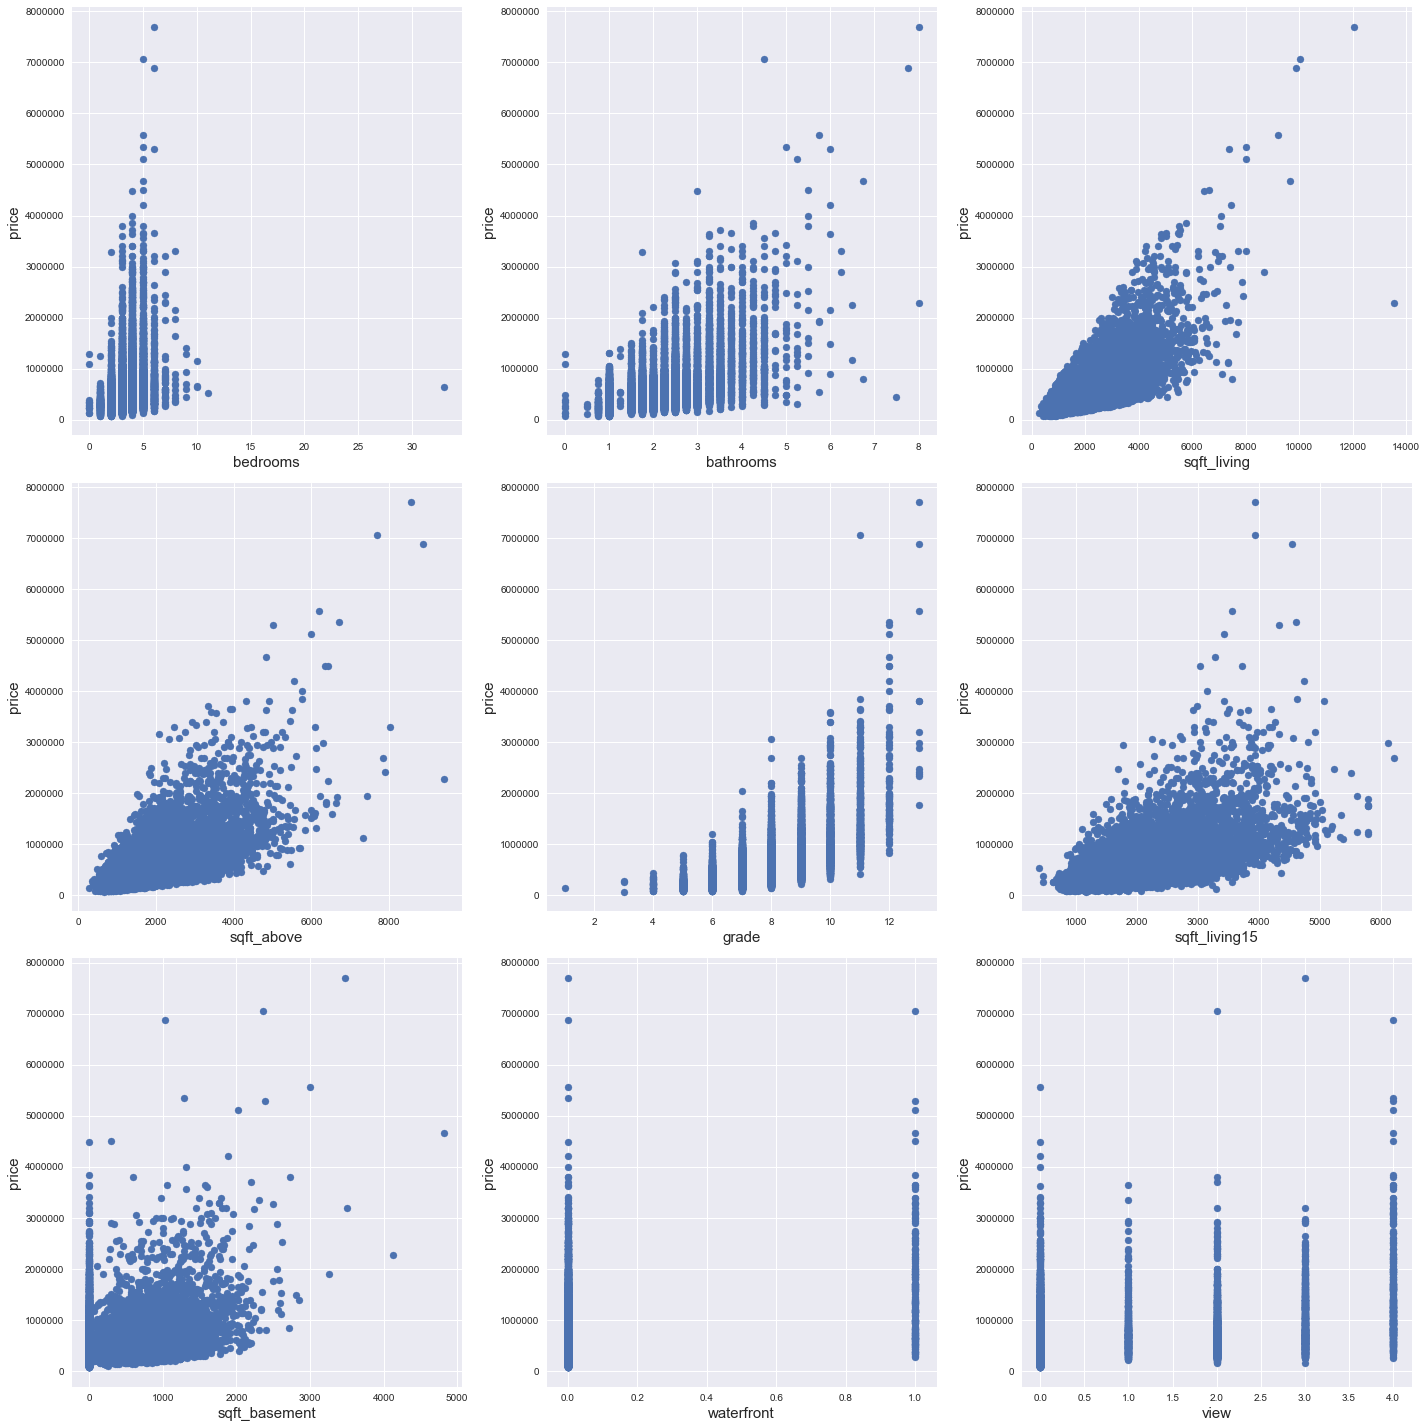

In [5]:
fig = plt.figure(figsize = (20,20))

#1

ax1 = fig.add_subplot(331)
ax1.scatter(df.bedrooms,df.price)
ax1.set_xlabel('bedrooms', fontsize = 15)
ax1.set_ylabel('price', fontsize = 15)

#2
ax2 = fig.add_subplot(332)
ax2.scatter(df.bathrooms,df.price)
ax2.set_xlabel('bathrooms', fontsize = 15)
ax2.set_ylabel('price', fontsize = 15)

#3
ax3 = fig.add_subplot(333)
ax3.scatter(df.sqft_living,df.price)
ax3.set_xlabel('sqft_living', fontsize = 15)
ax3.set_ylabel('price', fontsize = 15)

#4
ax4 = fig.add_subplot(334)
ax4.scatter(df.sqft_above,df.price)
ax4.set_xlabel('sqft_above', fontsize = 15)
ax4.set_ylabel('price', fontsize = 15)

#5
ax5 = fig.add_subplot(335)
ax5.scatter(df.grade,df.price)
ax5.set_xlabel('grade', fontsize = 15)
ax5.set_ylabel('price', fontsize = 15)

#6
ax6 = fig.add_subplot(336)
ax6.scatter(df.sqft_living15,df.price)
ax6.set_xlabel('sqft_living15', fontsize = 15)
ax6.set_ylabel('price', fontsize = 15)

#7
ax7 = fig.add_subplot(337)
ax7.scatter(df.sqft_basement,df.price)
ax7.set_xlabel('sqft_basement', fontsize = 15)
ax7.set_ylabel('price', fontsize = 15)

#8
ax8 = fig.add_subplot(338)
ax8.scatter(df.waterfront,df.price)
ax8.set_xlabel('waterfront', fontsize = 15)
ax8.set_ylabel('price', fontsize = 15)

#9
ax9 = fig.add_subplot(339)
ax9.scatter(df.view,df.price)
ax9.set_xlabel('view', fontsize = 15)
ax9.set_ylabel('price', fontsize = 15)


plt.tight_layout()

In [6]:
def remove_outliers(data,m=1.5):
    
    return data[abs(data - np.mean(data)) < m*np.std(data)]

In [7]:
df['Age'] = 2017 - df.yr_built
df = df.drop('yr_built',1)
df['Basement_or_not'] =  df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

df['renovated_or_not'] =  df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

df = df.drop('sqft_basement',1)

df = df.drop('yr_renovated',1)

df['bath_new'] = df['bathrooms']*2

df = df.drop('bathrooms',1)

df_zipcode = pd.get_dummies(df['zipcode'],drop_first = True).iloc[:,1:]
df = pd.concat([df,df_zipcode],axis =1)
df = df.drop('zipcode',axis = 1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 81 columns):
price               21613 non-null float64
bedrooms            21613 non-null int64
sqft_living         21613 non-null int64
floors              21613 non-null float64
waterfront          21613 non-null int64
view                21613 non-null int64
grade               21613 non-null int64
sqft_above          21613 non-null int64
sqft_living15       21613 non-null int64
Age                 21613 non-null int64
Basement_or_not     21613 non-null int64
renovated_or_not    21613 non-null int64
bath_new            21613 non-null float64
98003               21613 non-null uint8
98004               21613 non-null uint8
98005               21613 non-null uint8
98006               21613 non-null uint8
98007               21613 non-null uint8
98008               21613 non-null uint8
98010               21613 non-null uint8
98011               21613 non-null uint8
98014               2161

In [8]:
y = df['price']
X = df.iloc[:,1:]
X.head()

,bedrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_living15,Age,Basement_or_not,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3,1180,1.0,0,0,7,1180,1340,62,0,...,0,0,0,0,0,0,1,0,0,0
1,3,2570,2.0,0,0,7,2170,1690,66,1,...,0,0,0,0,0,0,0,0,0,0
2,2,770,1.0,0,0,6,770,2720,84,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1960,1.0,0,0,7,1050,1360,52,1,...,0,0,0,0,0,0,0,0,0,0
4,3,1680,1.0,0,0,8,1680,1800,30,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
sd=[1.5,1.6,1.7,1.8,1.9,1.9143,2,2.1,2.2,2.3,2.4,2.45,2.5,2.6,2.7]

for i in sd:
    new_df = remove_outliers(df,m =i)
    
    new_df.dropna(inplace = True)
    
    new_y = new_df['price']
    new_X = new_df.iloc[:,1:]
    
    X_train, X_test, y_train, y_test = train_test_split(new_X, new_y , train_size = 0.8, random_state = 0)
    
    lassoreg = Lasso()
    lassoreg.fit(X_train, y_train)
    y_pred_lasso = lassoreg.predict(X_test)
    
    RMSE_lasso_test = mean_squared_error(y_test,y_pred_lasso)**0.5
    print(RMSE_lasso_test)
    print(i)


37786.3996268
1.5
45596.2267871
1.6
46958.7144412
1.7
45813.5220838
1.8
39732.4783054
1.9
39333.6678021
1.9143
48185.704762
2
47400.1357537
2.1
49265.7826455
2.2
38699.6935612
2.3
38514.3030893
2.4
38514.3030893
2.45
41424.9751859
2.5
54022.3200956
2.6
54022.3200956
2.7


(518, 81)
(104,)


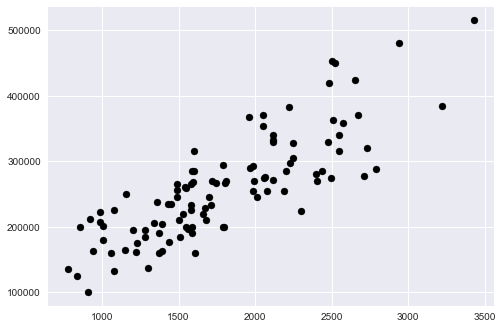

In [10]:
new_df = remove_outliers(df,m =2.4)
new_df.dropna(inplace = True)
new_y = new_df[['price']]
new_X = new_df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y , train_size = 0.8, random_state = 0)
lassoreg = Lasso()
lassoreg.fit(X_train, y_train)
y_pred_lasso = lassoreg.predict(X_test)

print(new_df.shape)
print(y_pred_lasso.shape)
plt.scatter(X_test['sqft_living'], y_test,  color='black')


#This removes a lot of data

In [11]:
new_X.shape

(518, 80)

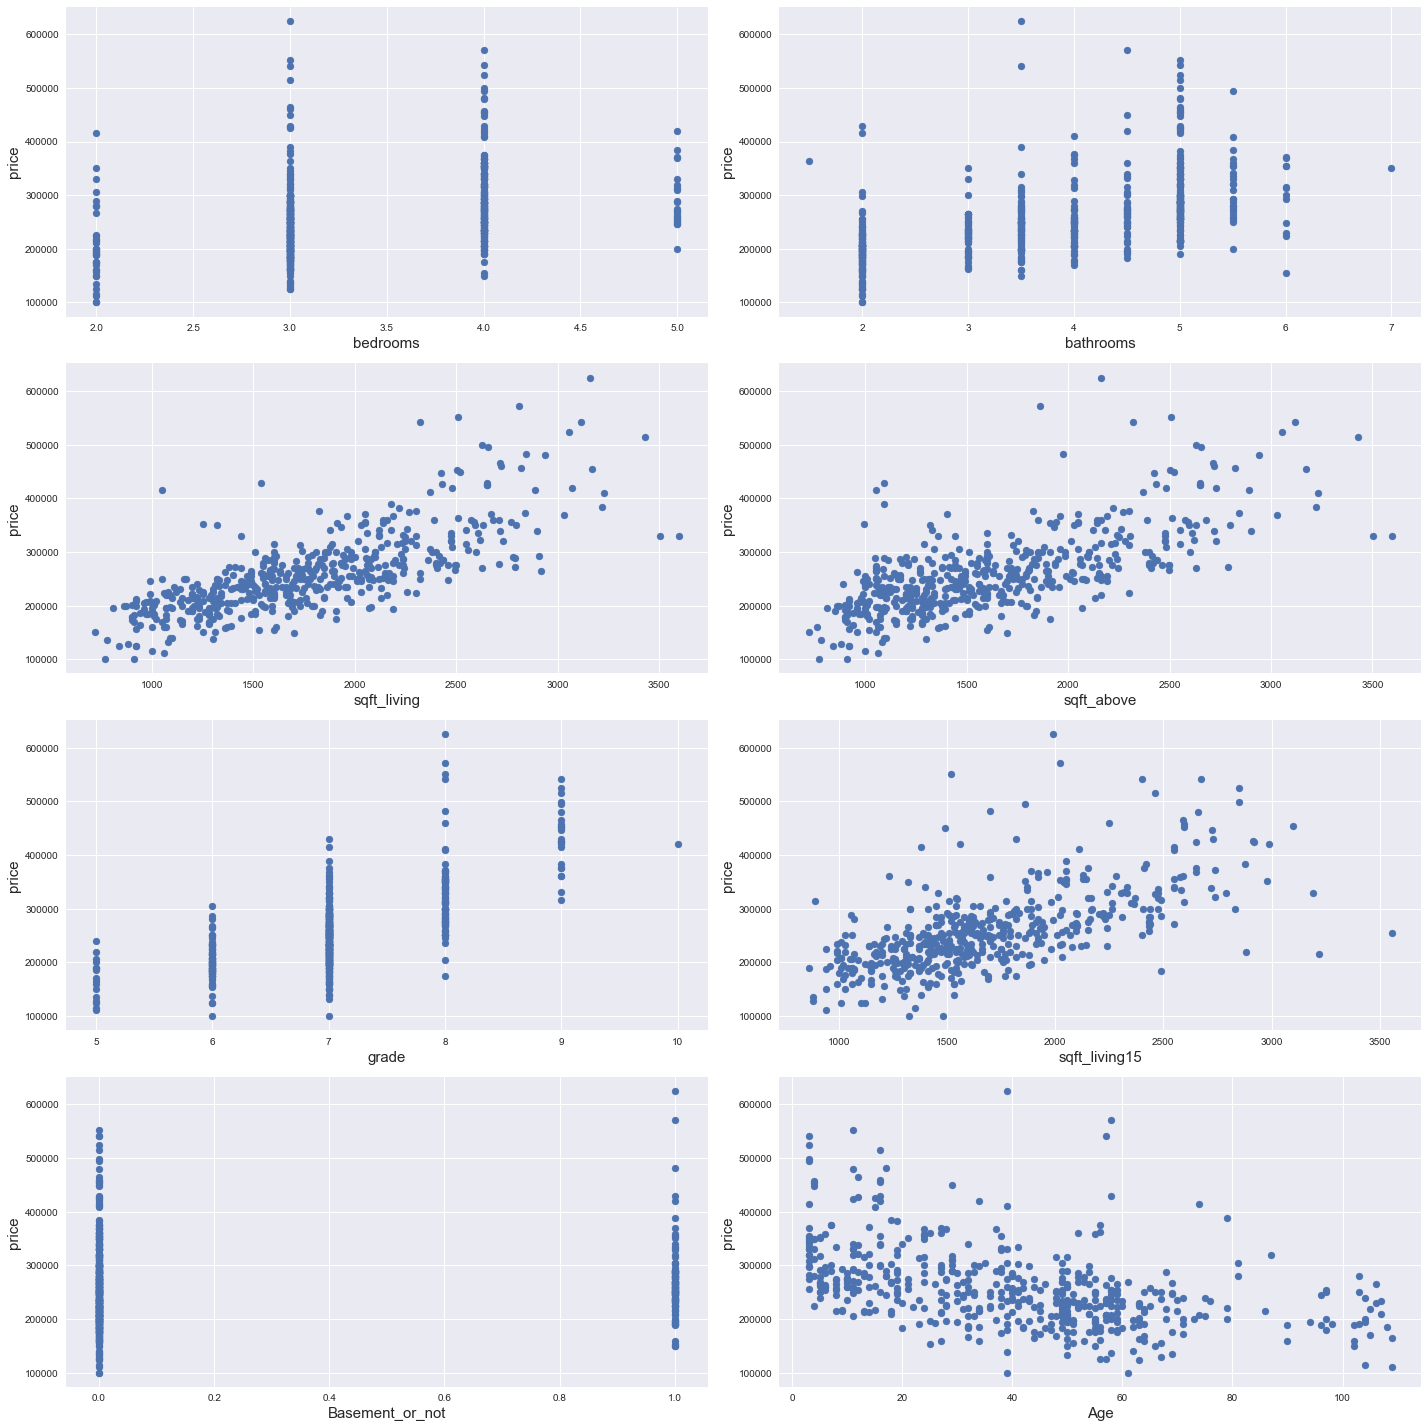

In [13]:
fig = plt.figure(figsize = (20,20))

#1

ax1 = fig.add_subplot(421)
ax1.scatter(new_df.bedrooms,new_df.price)
ax1.set_xlabel('bedrooms', fontsize = 15)
ax1.set_ylabel('price', fontsize = 15)

#2
ax2 = fig.add_subplot(422)
ax2.scatter(new_df.bath_new,new_df.price)
ax2.set_xlabel('bathrooms', fontsize = 15)
ax2.set_ylabel('price', fontsize = 15)

#3
ax3 = fig.add_subplot(423)
ax3.scatter(new_df.sqft_living,new_df.price)
ax3.set_xlabel('sqft_living', fontsize = 15)
ax3.set_ylabel('price', fontsize = 15)

#4
ax4 = fig.add_subplot(424)
ax4.scatter(new_df.sqft_above,new_df.price)
ax4.set_xlabel('sqft_above', fontsize = 15)
ax4.set_ylabel('price', fontsize = 15)

#5
ax5 = fig.add_subplot(425)
ax5.scatter(new_df.grade,new_df.price)
ax5.set_xlabel('grade', fontsize = 15)
ax5.set_ylabel('price', fontsize = 15)

#6
ax6 = fig.add_subplot(426)
ax6.scatter(new_df.sqft_living15,new_df.price)
ax6.set_xlabel('sqft_living15', fontsize = 15)
ax6.set_ylabel('price', fontsize = 15)

#7
ax7 = fig.add_subplot(427)
ax7.scatter(new_df.Basement_or_not,new_df.price)
ax7.set_xlabel('Basement_or_not', fontsize = 15)
ax7.set_ylabel('price', fontsize = 15)

#8
ax8 = fig.add_subplot(428)
ax8.scatter(new_df.Age,new_df.price)
ax8.set_xlabel('Age', fontsize = 15)
ax8.set_ylabel('price', fontsize = 15)



plt.tight_layout()
